# Chapter 5: Statistics

In [8]:
import random
import collections
import matplotlib.pyplot as plt

In [2]:
num_friends = [100, 49, 41, 40, 25, 49, 22, 83, 130, 44, 84, 23, 49, 30, 41, 25, 49, 38, 37]

In [3]:
for i in range(100):
    num_friends.append(random.randint(1,25))

In [4]:
print(num_friends)

[100, 49, 41, 40, 25, 49, 22, 83, 130, 44, 84, 23, 49, 30, 41, 25, 49, 38, 37, 4, 6, 4, 8, 22, 19, 15, 20, 10, 3, 21, 23, 20, 14, 22, 24, 20, 12, 9, 1, 21, 13, 17, 25, 2, 9, 23, 18, 21, 11, 17, 7, 17, 3, 16, 5, 25, 10, 16, 22, 16, 10, 20, 13, 17, 12, 14, 20, 9, 10, 4, 18, 22, 10, 20, 22, 20, 1, 19, 5, 16, 21, 21, 17, 0, 15, 14, 17, 16, 17, 12, 0, 24, 21, 11, 7, 16, 22, 5, 19, 15, 12, 17, 9, 11, 23, 16, 24, 5, 2, 9, 14, 11, 17, 0, 16, 12, 4, 24, 22]


In [5]:
friend_counts = collections.Counter(num_friends)

In [6]:
xs = range(101)
ys = [friend_counts[x] for x in xs]

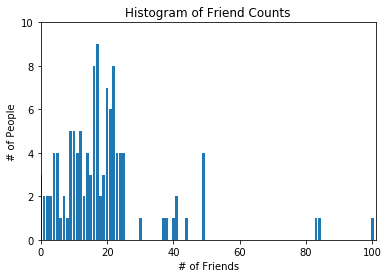

In [11]:
plt.bar(xs, ys)
plt.axis([0, 101, 0, 10])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of Friends")
plt.ylabel("# of People")
plt.show()

In [15]:
num_points = len(num_friends)
print(num_points)

119


In [17]:
largest_value = max(num_friends)
print(largest_value)
smallest_value = min(num_friends)
print(smallest_value)

130
0
